In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define number of samples
num_samples = 5000

# Generate synthetic data
carbon_emissions = np.random.uniform(50, 400, num_samples)  # Emissions in hypothetical units x1
energy_output = np.random.uniform(100, 1000, num_samples)   # Energy output in hypothetical units x2
renewability_index = np.random.uniform(0, 1, num_samples)   # Index from 0 (non-renewable) to 1 (fully renewable) x3
cost_efficiency = np.random.uniform(0.5, 5, num_samples)    # Cost efficiency score x4

# Generating a binary target variable based on a condition
# This is just an example: high renewability and low emissions favor sustainability
sustainability = [ # sustainability = y
    1 if (emission < 200 and renewability > 0.5 and cost < 3) else 0
    for emission, renewability, cost in zip(carbon_emissions, renewability_index, cost_efficiency) # learn zip function by own
]

# Create DataFrame
data = pd.DataFrame({
    'carbon_emissions': carbon_emissions,
    'energy_output': energy_output,
    'renewability_index': renewability_index,
    'cost_efficiency': cost_efficiency,
    'sustainability': sustainability
})

# Display the first few rows
print(data.head())

# Optionally, save to CSV for later use
data.to_csv('green_tech_data.csv', index=False) # tocsv is used to save the data and toread is used to import data.


   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     454.271968            0.373641         2.748516   
1        382.750007     526.092093            0.332912         3.860360   
2        306.197880     869.092654            0.176154         3.032001   
3        259.530469     406.003947            0.607267         0.874862   
4        104.606524     882.684716            0.476624         1.335111   

   sustainability  
0               0  
1               0  
2               0  
3               0  
4               0  


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('green_tech_data.csv')
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,454.271968,0.373641,2.748516,0
1,382.750007,526.092093,0.332912,3.860360,0
2,306.197880,869.092654,0.176154,3.032001,0
3,259.530469,406.003947,0.607267,0.874862,0
4,104.606524,882.684716,0.476624,1.335111,0


In [4]:

# Inspect for missing values and general structure
print(data.isnull().sum())
# Handle missing values if necessary
data.fillna(data.mean(), inplace=True) # here fillna is used to fill missing value

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [5]:
# Example feature selection
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']  # Target variable

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.941


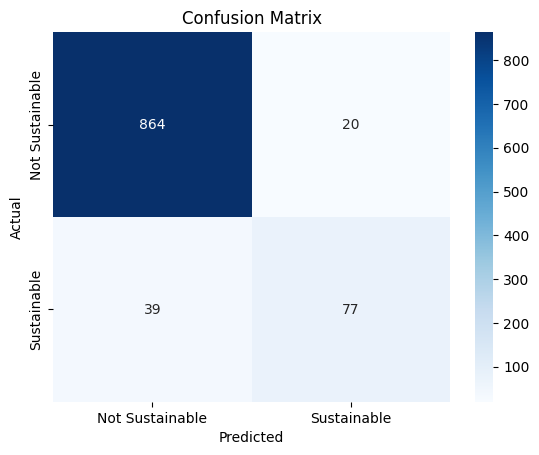

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sustainable', 'Sustainable'], 
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.96      0.98      0.97       884
    Sustainable       0.79      0.66      0.72       116

       accuracy                           0.94      1000
      macro avg       0.88      0.82      0.84      1000
   weighted avg       0.94      0.94      0.94      1000



In [14]:
# Feature importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.025076
energy_output          0.000084
renewability_index     7.205561
cost_efficiency       -1.530639


In [15]:
import joblib
# Save the model to a file
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']